In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import math
from tqdm import tqdm

from scipy import stats

In [3]:
def plotRateRDDensity(rd_k,path="",title=""):
    plt.rc('font',size=14)
    plt.figure(figsize=(8,6))
    # rd_k= (res.d2ome_k - res.new_k)/res.d2ome_k
    ax=sns.histplot(rd_k, kde=True, #bins=50,
                label=f"n={len(rd_k)},μ = {int(100*np.mean(rd_k))/100}, \nmedian = {int(100*np.median(rd_k))/100}, \nsd = {int(100*np.std(rd_k))/100}",
                color='white',alpha=0.1,edgecolor=('black',0.75) )
    ax.lines[0].set_color('k')
    ax.lines[0].set_alpha(0.75) 
    ax.lines[0].set_ls(':') 
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel(r'$\frac{ k _{\:Time\: course\: data} - k _{\:Single\: time\: point}}{k _{\:Time\: course\: data}}$')
    plt.legend()
    plt.tight_layout()
    if len(path)>0:
        plt.savefig(f"{path}/{title}_RD_k.jpeg",dpi=900)
    plt.show()

In [4]:
def getpath(organ,_time,_rsquared,_numberofterms):
    path= f"Figures/{organ}/Day_{_time}/r2_{_rsquared}/" 
    title=f"{organ}_day_{_time}_fsr.csv"   
    return path+title

In [5]:
plt.rc('font',size=12)
plt.figure(figsize=(10,6)) 
def plotRateRDDensity(rd_k,col,title=""):
    
    ax=sns.histplot(rd_k, kde=True, #bins=50,
                # label=f"{title} n={len(rd_k)},\nμ = {int(1000*np.mean(rd_k))/1000}, median = {int(1000*np.median(rd_k))/1000}, \nsd = {int(1000*np.std(rd_k))/1000}",
                # label=f"n={len(rd_k)},μ = {int(1000*np.mean(rd_k))/1000}, \nmedian = {int(1000*np.median(rd_k))/1000}, sd = {int(1000*np.std(rd_k))/1000}",
                label=f"{title} n={len(rd_k)}, mode= {int(1000*stats.mode(rd_k)[0])/1000},\nμ = {int(1000*np.mean(rd_k))/1000}, median = {int(1000*np.median(rd_k))/1000}, sd = {int(1000*np.std(rd_k))/1000}",
                color=col,alpha=0.1,edgecolor=(col,0.75) )
    # ax.lines[0].set_color('k')
    ax.lines[0].set_alpha(0.75) 
    # ax.lines[0].set_ls(':') 
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel(r'$ I_{0}(0)^{theo} - I_{0}(t)^{exp} $' +" , " + r'$ I_{0}(0)^{theo} - I_{0}(t)^{exp} $' )
    # plt.legend(bbox_to_anchor=(1.55, 1), loc='upper right', borderaxespad=0, frameon=False)
    plt.legend( loc='upper right', borderaxespad=0, frameon=False)
    # plt.tight_layout()
    # plt.xlim([-0.4,0.4])

<Figure size 1000x600 with 0 Axes>

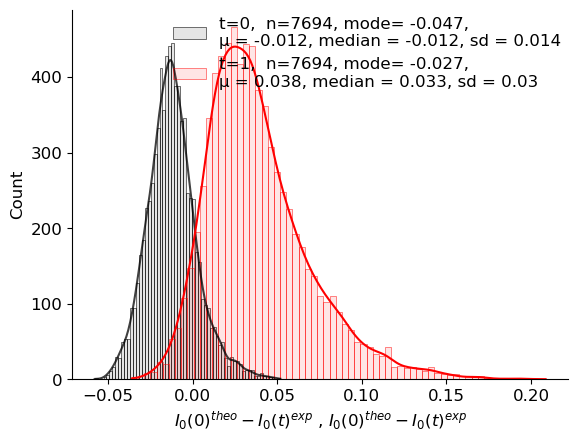

In [6]:
organ="Liver"
# organ='heart'
time=1
rsquared=0.9

data=pd.read_csv(getpath(organ,time,rsquared,1))


plotRateRDDensity((data.M0-data.I0_0_exp),'k',"t=0, ")
plotRateRDDensity((data.M0-data.i0_t_exp),'r',f"t={time}, ")

liver


6it [00:01,  4.81it/s]


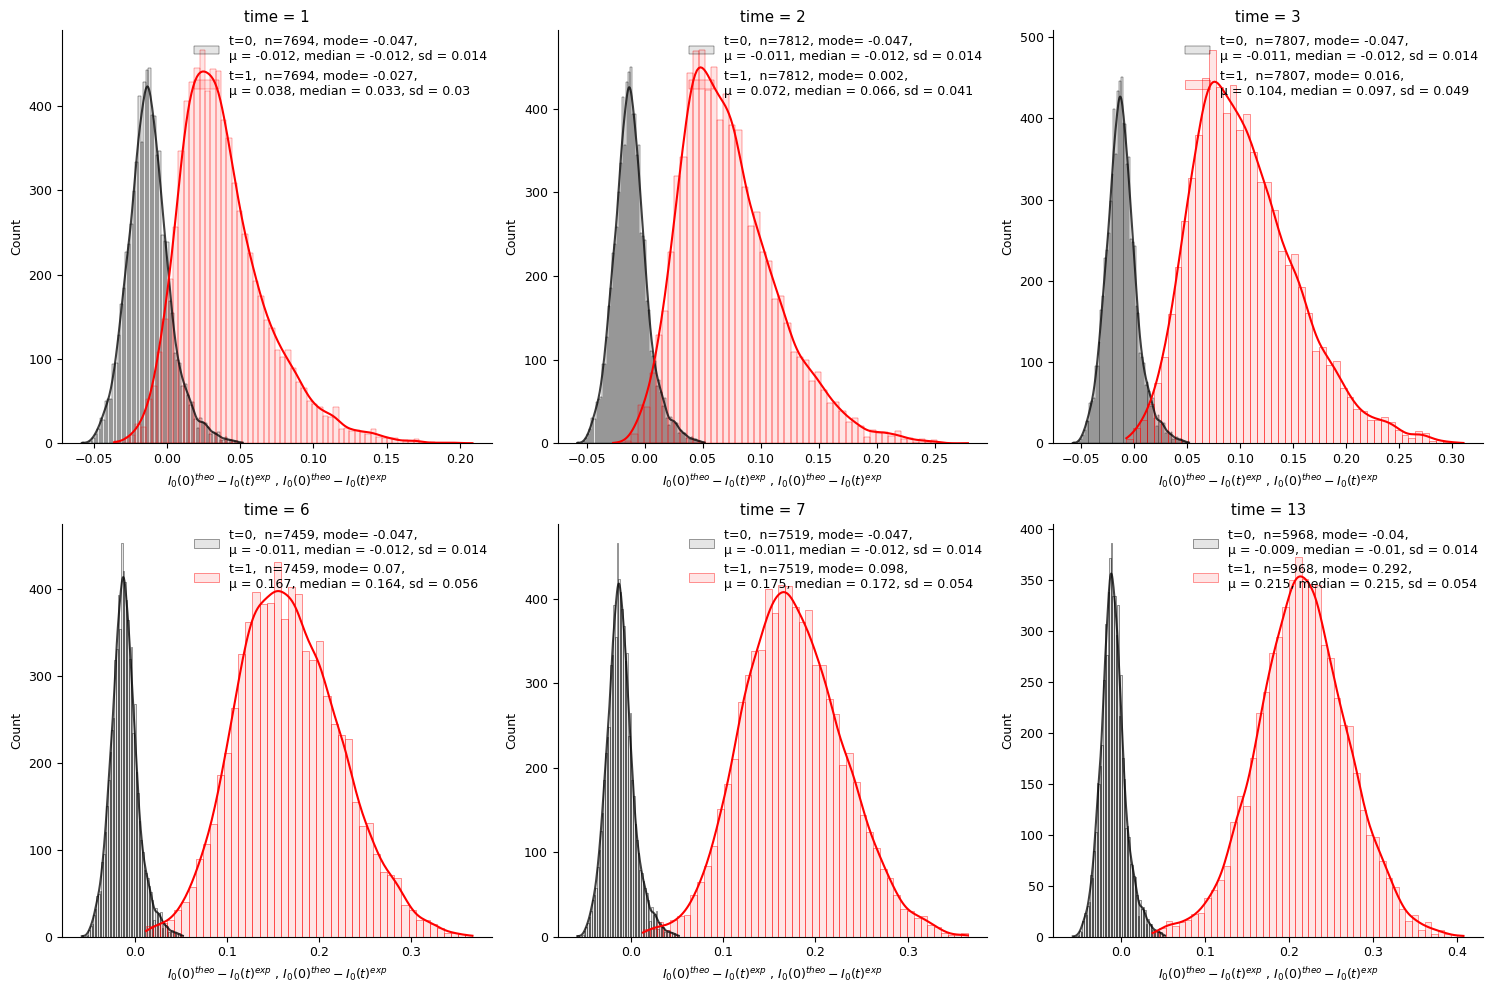

muscle


6it [00:01,  4.55it/s]


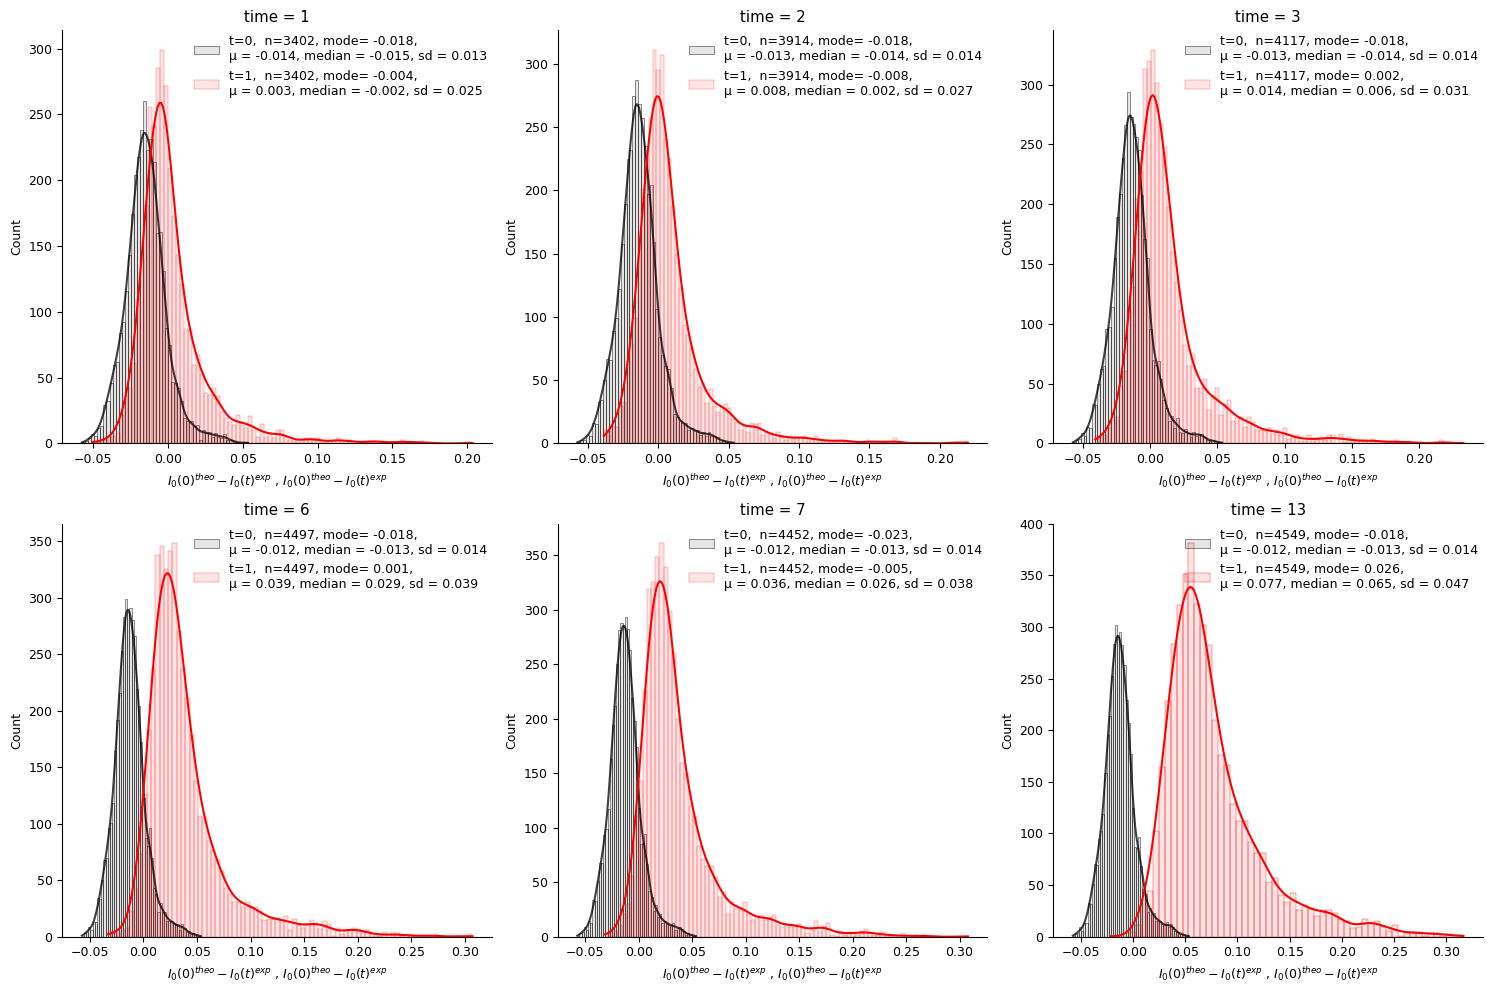

heart


6it [00:01,  4.47it/s]


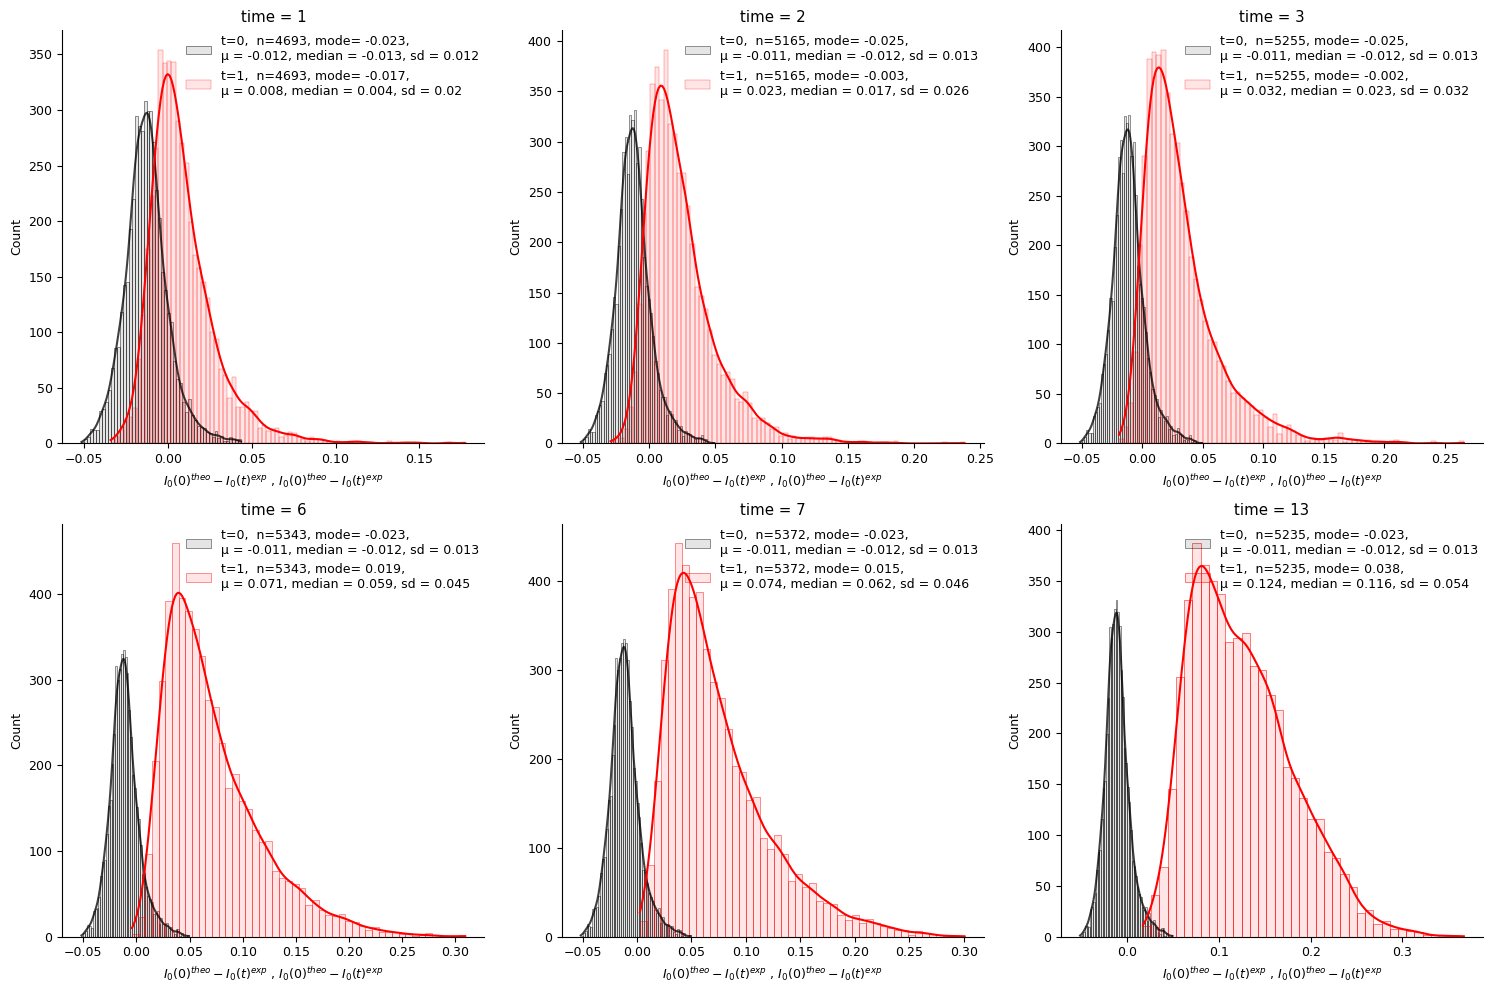

kidney


6it [00:01,  4.43it/s]


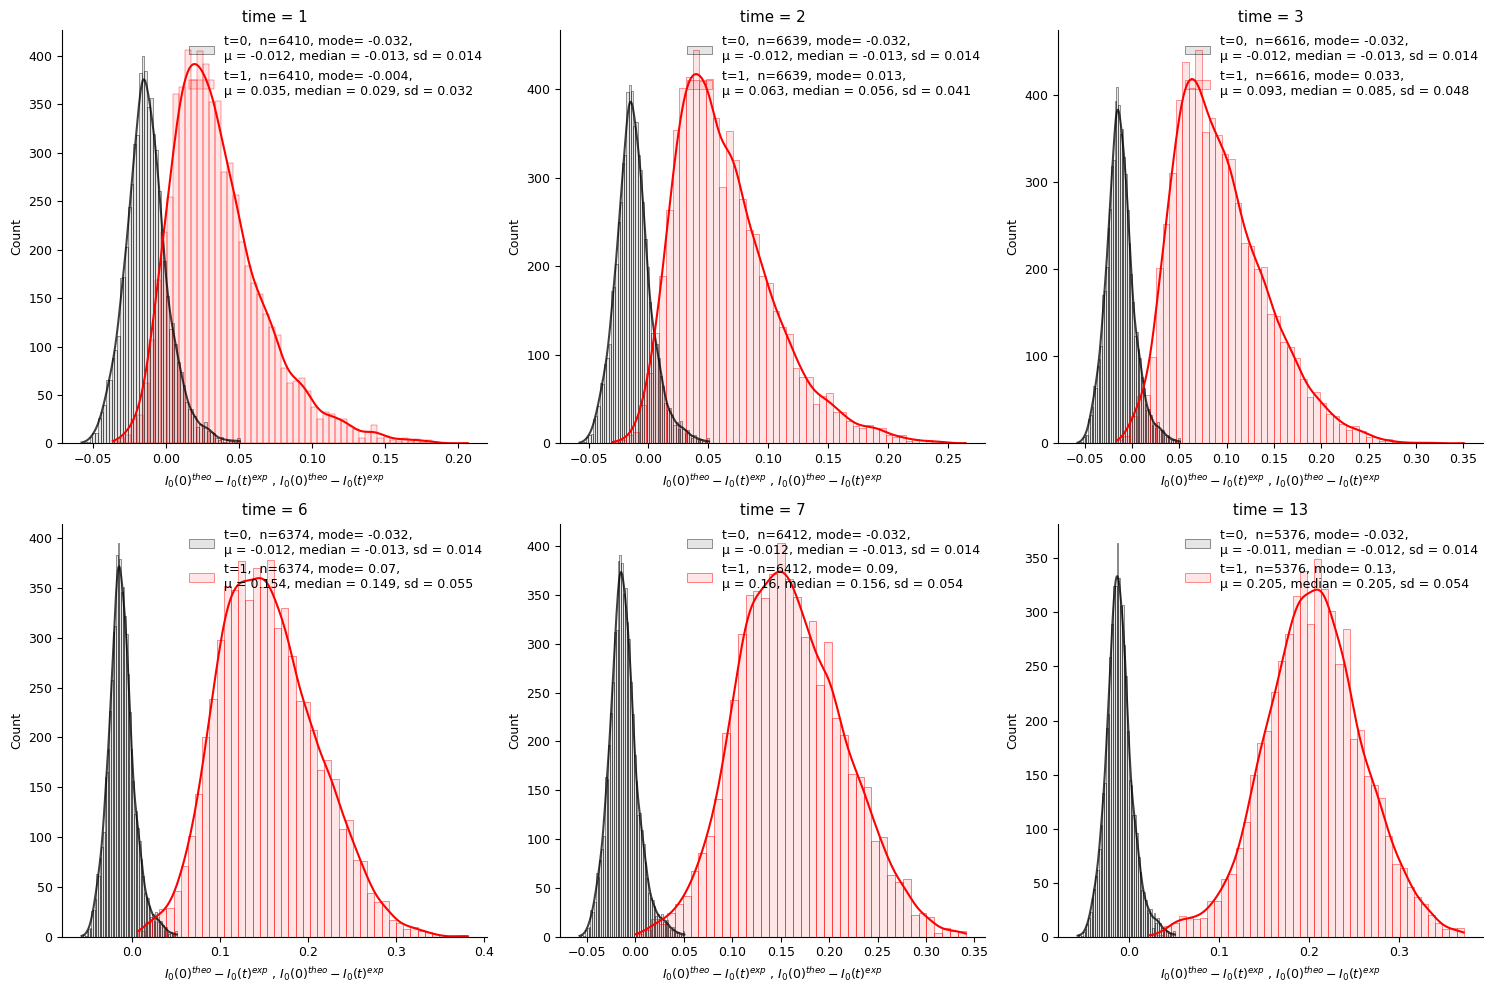

In [7]:
rsquared=0.9
for organ in ['liver','muscle','heart','kidney']:
    print(organ)
    plt.figure(figsize=(15,10))
    plt.rc('font',size=9)
    for index,_time in tqdm(enumerate([1 ,2 ,3 ,6 ,7,13])):
        
        plt.subplot(2,3,index+1)
        data=pd.read_csv(getpath(organ,_time,rsquared,1))

        plt.title(f"time = {_time}")
        plotRateRDDensity((data.M0-data.I0_0_exp),'k',"t=0, ")
        plotRateRDDensity((data.M0-data.i0_t_exp),'r',f"t={time}, ")
        
    plt.tight_layout()
    plt.savefig(f"Figures/{organ}_i0_dif.jpeg",dpi=900);
    plt.show()